In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#2020
sample_submission_df_2020 = pd.read_csv("/kaggle/input/data11/Data/Raw CSVs/2020/sample_submission.csv")
test_df_2020 = pd.read_csv("/kaggle/input/data11/Data/Raw CSVs/2020/test.csv")
train_df_2020 = pd.read_csv("/kaggle/input/data11/Data/Raw CSVs/2020/train.csv")

#2019
train_ground_truth_df_2019 = pd.read_csv("/kaggle/input/data11/Data/Raw CSVs/2019/ISIC_2019_Training_GroundTruth.csv")
test_df_2019 = pd.read_csv("/kaggle/input/data11/Data/Raw CSVs/2019/Patient MetaData/ISIC_2019_Test_Metadata.csv")
train_df_2019 = pd.read_csv("/kaggle/input/data11/Data/Raw CSVs/2019/Patient MetaData/ISIC_2019_Training_Metadata.csv")

# processed
Processed_2019to2020_df = pd.read_csv("/kaggle/input/data11/Data/Processed CSV's/train_2020_and_2019_with_9_Labels.csv")
Processed_withDetails_df = pd.read_csv("/kaggle/input/data11/Data/Processed CSV's/train_2020_and_2019_withPateintDetail_9_labels.csv")


In [32]:
print("For 2020 RAW Data")
print("sample_submission_df_2020:", sample_submission_df_2020.shape)
print("test_df_2020:", test_df_2020.shape)
print("train_df_2020:", train_df_2020.shape)
print()

print("For 2019 RAW Data")
print("train_ground_truth_df_2019:", train_ground_truth_df_2019.shape)
print("test_df_2019:", test_df_2019.shape)
print("train_df_2019:", train_df_2019.shape)
print()

print("For processed CSVs (2020 + 2019)")
print("Processed_2019to2020_df (no demographics):", Processed_2019to2020_df.shape)
print("Processed_withDetails_df:", Processed_withDetails_df.shape)

For 2020 RAW Data
sample_submission_df_2020: (10982, 2)
test_df_2020: (10982, 5)
train_df_2020: (33126, 8)

For 2019 RAW Data
train_ground_truth_df_2019: (25331, 10)
test_df_2019: (8238, 4)
train_df_2019: (25331, 5)

For processed CSVs (2020 + 2019)
Processed_2019to2020_df (no demographics): (58031, 2)
Processed_withDetails_df: (58031, 5)


In [33]:
for name, df in [
    ("train_df_2020", train_df_2020),
    ("test_df_2020", test_df_2020),
    ("train_df_2019", train_df_2019),
    ("train_ground_truth_df_2019", train_ground_truth_df_2019),
    ("Processed_2019to2020_df", Processed_2019to2020_df),
    ("Processed_withDetails_df", Processed_withDetails_df),
]:
    print(f"\n{name} info:")
    print(df.info())


train_df_2020 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None

test_df_2020 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------     

In [34]:
def show_null_counts(df, title):
    print(title)
    display(pd.DataFrame(df.isnull().sum(), columns=['Null count']))

show_null_counts(train_df_2020, "Train set 2020 RAW missing values")
show_null_counts(test_df_2020,  "Test set 2020 RAW missing values")

show_null_counts(train_df_2019,           "Train set 2019 RAW missing values")
show_null_counts(train_ground_truth_df_2019, "Train Ground Truth 2019 RAW missing values")
show_null_counts(test_df_2019,            "Test set 2019 RAW missing values")

show_null_counts(Processed_2019to2020_df,   "Processed data WITHOUT demographic details missing values")
show_null_counts(Processed_withDetails_df,  "Processed data WITH demographic details missing values")


Train set 2020 RAW missing values


,Null count
image_name,0
patient_id,0
sex,65
age_approx,68
anatom_site_general_challenge,527
diagnosis,0
benign_malignant,0
target,0


Test set 2020 RAW missing values


,Null count
image_name,0
patient_id,0
sex,0
age_approx,0
anatom_site_general_challenge,351


Train set 2019 RAW missing values


,Null count
image,0
age_approx,437
anatom_site_general,2631
lesion_id,2084
sex,384


Train Ground Truth 2019 RAW missing values


,Null count
image,0
MEL,0
NV,0
BCC,0
AK,0
BKL,0
DF,0
VASC,0
SCC,0
UNK,0


Test set 2019 RAW missing values


,Null count
image,0
age_approx,326
anatom_site_general,655
sex,339


Processed data WITHOUT demographic details missing values


,Null count
image,0
diagnosis,0


Processed data WITH demographic details missing values


,Null count
image,0
sex,0
age_approx,0
anatom_site_general,0
diagnosis,0


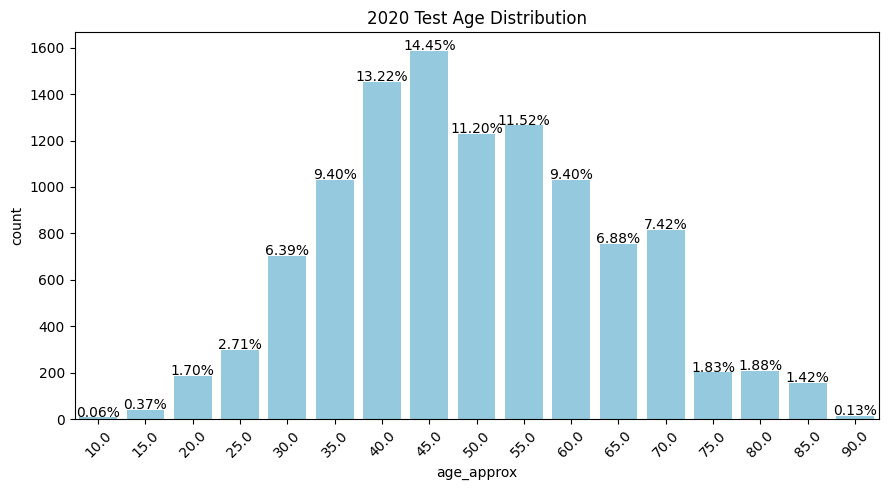

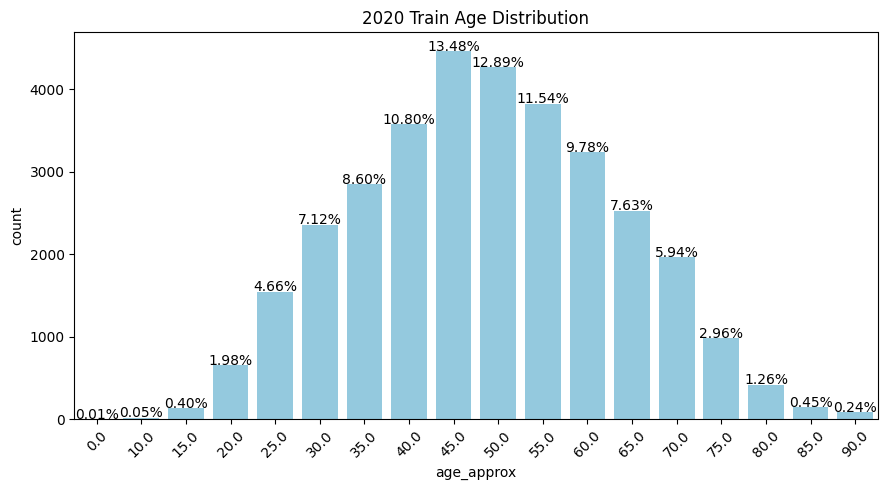

In [35]:
def plot_age(df, feature="age_approx", title="Age Distribution"):
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(
        data=df,
        x=feature,
        color="skyblue",     
        order=sorted(df[feature].dropna().unique())
    )

    plt.title(title)
    plt.xticks(rotation=45)

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 3,
            f"{100 * height / total:.2f}%",
            ha="center"
        )
    plt.tight_layout()
    plt.show()

plot_age(test_df_2020, title="2020 Test Age Distribution")
plot_age(train_df_2020, title="2020 Train Age Distribution")

,target,sex,age_approx,benign_malignant
0,0,female,10.000000,10
1,0,female,15.000000,77
2,0,female,20.000000,299
3,0,female,25.000000,975
4,0,female,30.000000,1391
5,0,female,35.000000,1528
6,0,female,40.000000,1788
7,0,female,45.000000,1935
8,0,female,50.000000,2064
9,0,female,55.000000,1955


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


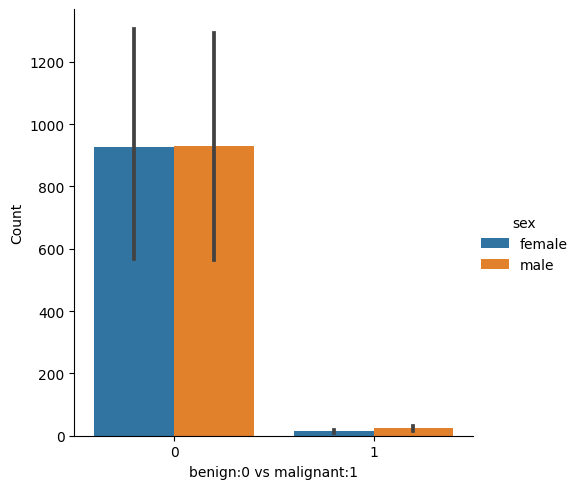

In [36]:
z = (
    train_df_2020
    .groupby(['target', 'sex', 'age_approx'])['benign_malignant']
    .count()
    .reset_index()
)

display(z.style.background_gradient(cmap='Reds'))

sns.catplot(
    x='target',
    y='benign_malignant',
    hue='sex',
    data=z,
    kind='bar'
)
plt.ylabel('Count')
plt.xlabel('benign:0 vs malignant:1')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_47/1717136426.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


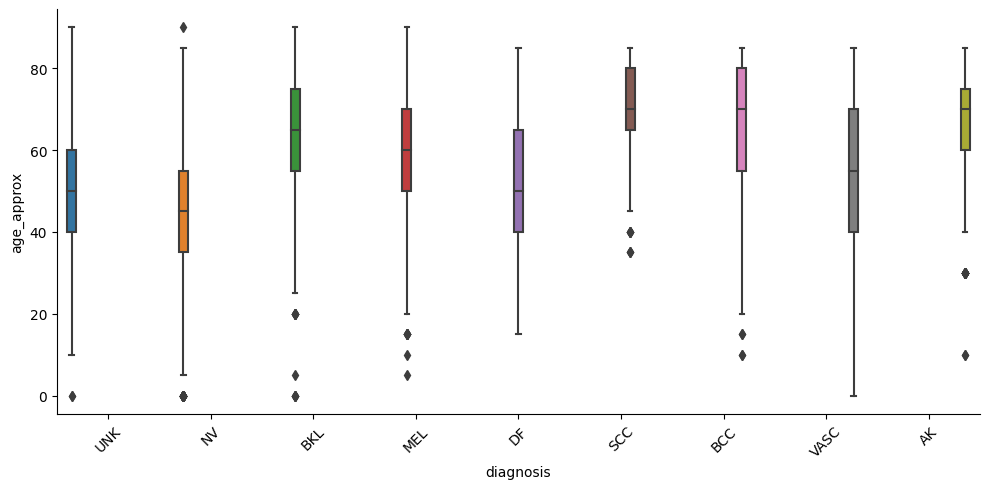

In [37]:
sns.catplot(
    x="diagnosis",
    y="age_approx",
    hue="diagnosis",
    data=Processed_withDetails_df,
    kind="box",
    height=5,
    aspect=2
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

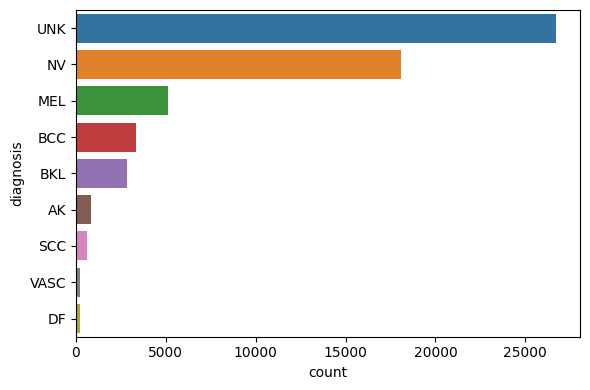

In [38]:
plt.figure(figsize=(6, 4)) 
ax = sns.countplot(
    data=Processed_2018to2020_df,
    y="diagnosis",
    order=Processed_2018to2020_df["diagnosis"].value_counts().index
)

ax.set_xlabel("count")
ax.set_ylabel("diagnosis")
plt.tight_layout()
plt.show()

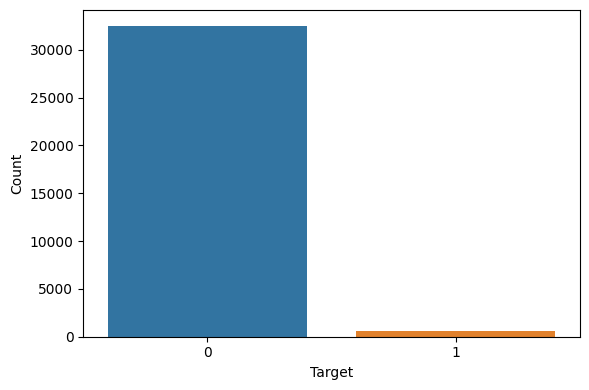

In [39]:
plt.figure(figsize=(6, 4))
ax2 = sns.countplot(x="target", data=train_df_2020)
ax2.set(xlabel='Target', ylabel='Count')
plt.tight_layout()
plt.show()